**Author:** Regina Hoo

**Institution:** Wellcome Sanger institute

**April, 2023**

---

### S4: Label transfer amnnotations from MCAv3 to object OR Leiden clustering

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata
import os
import sys
import glob
import matplotlib.pyplot as pl
#import episcanpy as epi

def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = './figures/EXP/label_transfer/'

#sc.settings.figdir = './figures/TW-Okae/preprocessing/'
#sc.settings.figdir = './figures/TWO/preprocessing/'
#sc.settings.figdir = './figures/AO-Okae/preprocessing/'

sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0


'/opt/conda/bin/python'

In [26]:
def Barplot(which_var, adata, var='idc_new', height=3, color = False, suffix= ''):
    
    '''
    Function to plot barplots plotting the proportion of cells per catergory in var, coming from each category in which_var.
    
    Parameters:
        which_var: column name in .obs. Contains the categories to contrast.
        adata: anndata object.
        var: column name in .obs. It contains the categories of the cells.
        height: plot height
        color: colors to use
        suffix: string. Suffix to be added at the end of the name of the plot.
    
    Return:
        Saves bar plot as a pdf.
        
    '''
    
    plotdata = pd.crosstab(adata.obs[var], adata.obs[which_var], normalize='index') * 100
    if 'category' in plotdata.index.dtype.name:
        plotdata.index.reorder_categories(adata.obs[var].cat.categories[::-1])

    if not color:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False)
    else:
        ax1 = plotdata.plot.barh(stacked = True, edgecolor = 'none', zorder = 3, figsize = (6,height), fontsize = 14, grid = False, 
                                 color = color)
    ax1.set_title(which_var+' %')
    ax1.set_ylabel(var)
    horiz_offset = 1
    vert_offset = 1.
    ax1 = ax1.legend(bbox_to_anchor = (horiz_offset, vert_offset))
    ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+ suffix+'.pdf',
                       bbox_inches='tight',
                       dpi=300, format= 'pdf', optimize=True)

### Read adata with Harmony integration

In [2]:
adata= sc.read('./output/rna2_counts_Pf_no_hum_Normalized_Harmony_adata.h5ad')

In [3]:
adata

AnnData object with n_obs × n_vars = 205631 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'id_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    obsp: 'connectivities', 'distances'

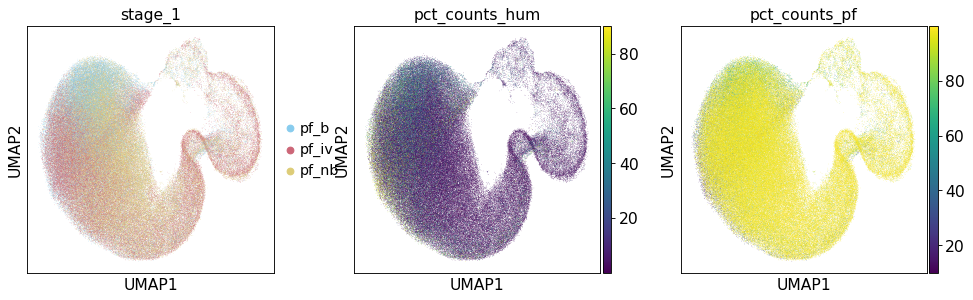

In [4]:
sc.pl.umap(adata, color=['stage_1', 'pct_counts_hum', 'pct_counts_pf'])

## Supplementary Figure S8D - UMAPs metadata

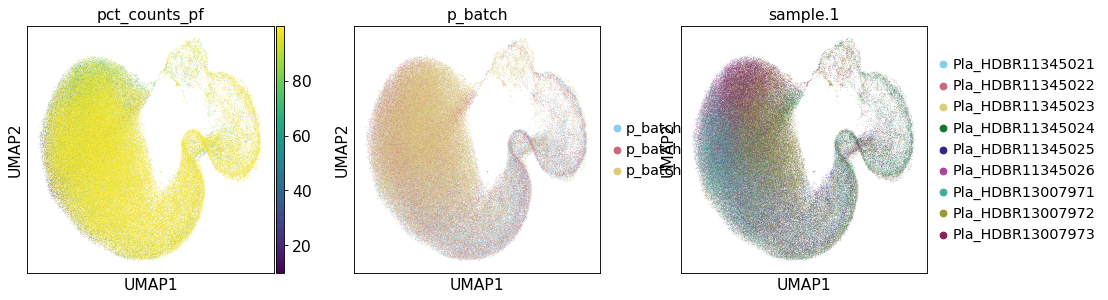

In [74]:
sc.pl.umap(adata, color=[ 'pct_counts_pf', 'p_batch', 'sample.1', ],  
           palette=palette1, ncols = 3, save='_harmony_npc15_theta0.pdf')

### Set additional sample IDs

In [5]:
adata.obs['sample.2'] = adata.obs['sample.1'].tolist()
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR11345021','sample.2'] = '1_Hrv107_pf_iv'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR11345022', 'sample.2'] = '3_Hrv107_pf_nb'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR11345023', 'sample.2'] = '5_Hrv107_pf_b'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR11345024', 'sample.2'] = '2_Hrv124_pf_iv'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR11345025', 'sample.2'] = '4_Hrv124_pf_nb'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR11345026', 'sample.2'] = '6_Hrv124_pf_b'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR12966649','sample.2'] = '1_Hrv168_pf_iv'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR12966650', 'sample.2'] = '3_Hrv168_pf_nb'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR12966651', 'sample.2'] = '5_Hrv168_pf_b'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR13007971', 'sample.2'] = '2_Hrv170_pf_iv'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR13007972', 'sample.2'] = '4_Hrv170_pf_nb'
adata.obs.at[adata.obs['sample.2'] == 'Pla_HDBR13007973', 'sample.2'] = '6_Hrv170_pf_b'

set(adata.obs['sample.2'])

{'1_Hrv107_pf_iv',
 '2_Hrv124_pf_iv',
 '2_Hrv170_pf_iv',
 '3_Hrv107_pf_nb',
 '4_Hrv124_pf_nb',
 '4_Hrv170_pf_nb',
 '5_Hrv107_pf_b',
 '6_Hrv124_pf_b',
 '6_Hrv170_pf_b'}

In [12]:
adata

AnnData object with n_obs × n_vars = 205631 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony', 'idc', 'probabilities', 'sample.2'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'id_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'umap', 'idc_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'raw_counts'
    o

... storing 'sample.2' as categorical


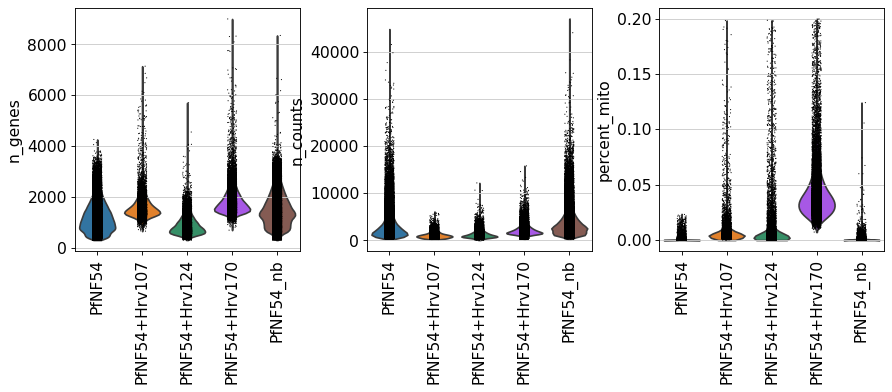

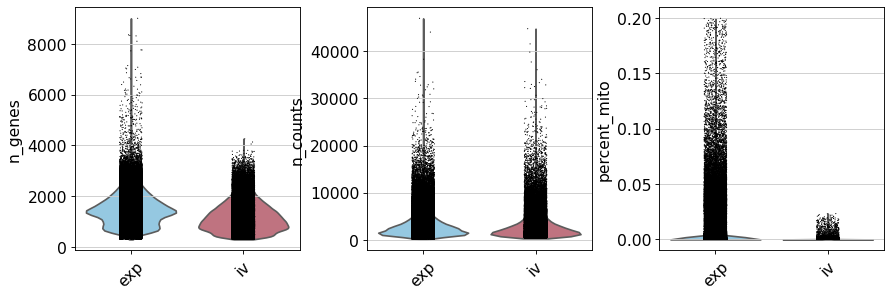

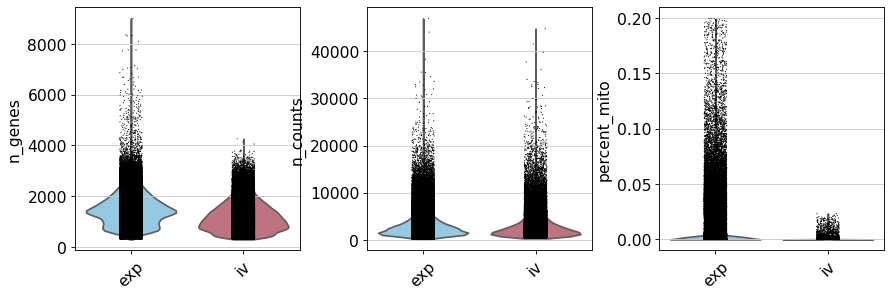

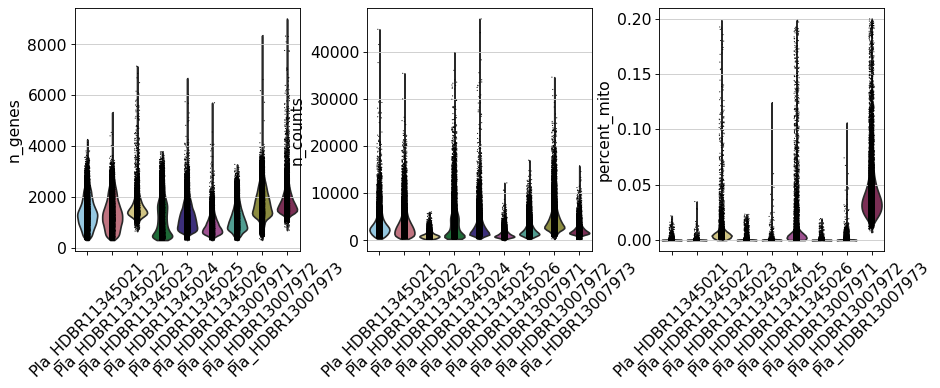

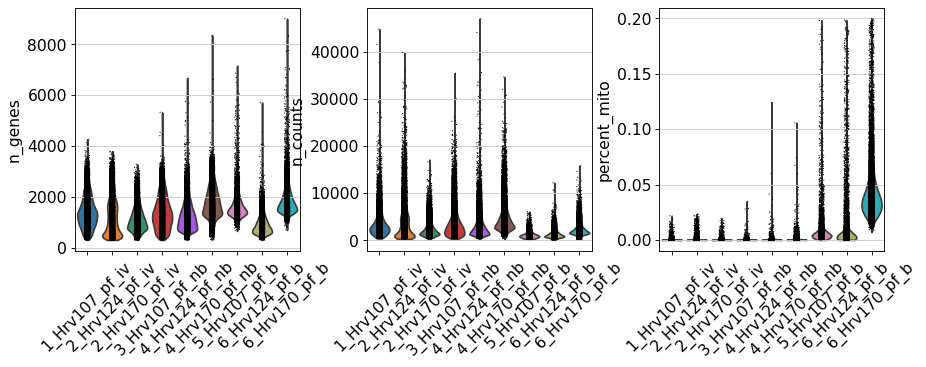

In [6]:
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=90, groupby='stage') 
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='proc')
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='proc') 
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='sample.1') 
sc.pl.violin(adata, ['n_genes', 'n_counts','percent_mito'], rotation=45, groupby='sample.2') 

    using 'X_pca' with n_pcs = 15
Storing dendrogram info using `.uns['dendrogram_leiden_harmony']`
categories: 0, 1, 2, etc.
var_group_labels: Rings, Schizonts, Gam, etc.


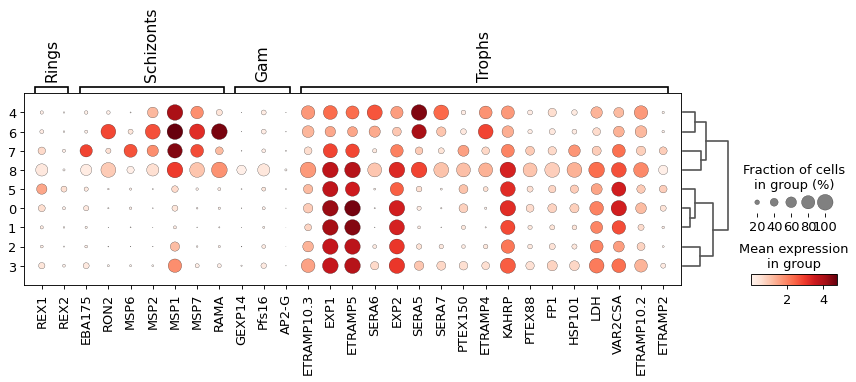

In [7]:
stage= {  'Rings': {'REX1', 'REX2'},
          'Schizonts': {'MSP1','MSP2','MSP6', 'MSP7','EBA175', 'RON2', 'RAMA'},
        'Gam':{'Pfs16', 'GEXP14', 'AP2-G'},
        'Trophs':{'VAR2CSA', 'KAHRP', 'LDH', 'FP1','ETRAMP2', 'ETRAMP4', 'ETRAMP5', 'ETRAMP10.2','ETRAMP10.3','EXP1',
                            'EXP2', 'PTEX150', 'PTEX88', 'HSP101', 'SERA6', 'SERA5','SERA7'}
              }

sc.pl.dotplot(adata, var_names=stage, groupby='leiden_harmony',  use_raw=False, dendrogram=True)

### Transfer  leiden cluters information

In [8]:
def identityTransfer(adata_CellsNewID, adata, field='idc'):
    
    '''
    Function to transfer the value in a .obs column, modifying only the cells included in adata_CellsNewID
    
    Parameters:
        adata_CellsNewID: anndata object with cells. These should have in their .obs[field] the new values to be transfer to adata
        adata: anndata object to modify. The value in .obs[field] will be modifies for all the cells in adata_CellsNewID
        field: column name in .obs to operate in
        
    '''
    
    #converting categorical into strings to introduce new categories
    adata.obs[field]=adata.obs[field].astype("string")


    #assigning the new categories to the cells in adata
    for cell in adata_CellsNewID.obs.index:
        adata.obs[field][cell] = adata_CellsNewID.obs[field][cell]

    #Returning strings into categorical 
    adata.obs[field]=adata.obs[field].astype("category")
    
    return(adata)

## Use only leiden clustering 

In [17]:
#Copying the value of the leiden cluster. The new column will help to change it's values for
# the cluster identity
adata.obs['idc_new']= adata.obs['leiden_harmony']


#Function that changes the cluster names as indicated
adata.obs['idc_new'] = (adata.obs["leiden_harmony"].map(lambda x: 
                            {"0": "2_early_trophozoite", "1": "2_early_trophozoite", "2": "2_early_trophozoite", "3": "2_early_trophozoite",
                            "4": "3_late_trophozoite", "5": "1_late_ring",  "6": "4_early_schizont", "7": "5_late_schizont","8": "6_gametocyte"}
                            .get(x, x)).astype("category"))

In [18]:
adata

AnnData object with n_obs × n_vars = 205631 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony', 'idc', 'probabilities', 'sample.2', 'idc_new'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'id_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'umap', 'idc_colors', 'sample.2_colors', 'dendrogram_leiden_harmony'
    obsm: 'X_pc

## Figure 5B - UMAP life cycle

In [19]:
idc=['#a2add0',  '#edf8a3', '#fca55d', '#e2514a','#47a0b3', '#a2d9a4', ]

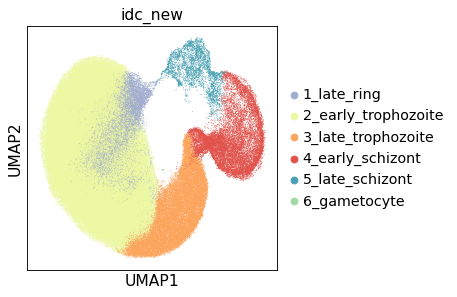

In [21]:
sc.pl.umap(adata, color=['idc_new'], palette = idc, size=2, save='_idc_new.pdf')

In [24]:
stage=[ "#494367", "#332288", "#AA4499"]

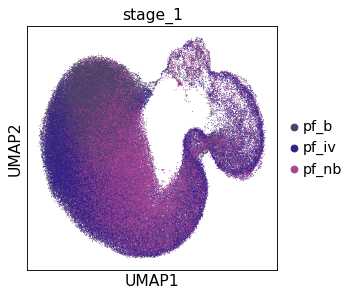

In [25]:
sc.pl.umap(adata, color=['stage_1'], palette = stage, size=2)

## Figure 5C - barplot life cycle stage per fraction 

<ipython-input-26-f7496d6ef01f>:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "optimize" which is no longer supported as of 3.3 and will become an error two minor releases later
  ax1.figure.savefig(str(sc.settings.figdir)+'/barplot_'+var+'_proportions_'+which_var+ suffix+'.pdf',


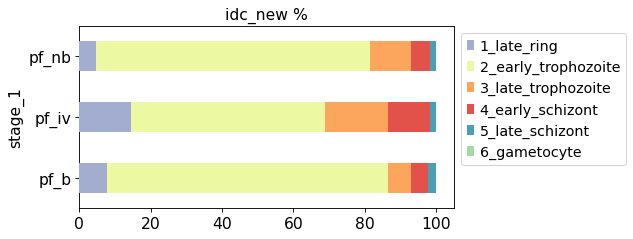

In [27]:
Barplot('idc_new', adata, var='stage_1', color = idc)

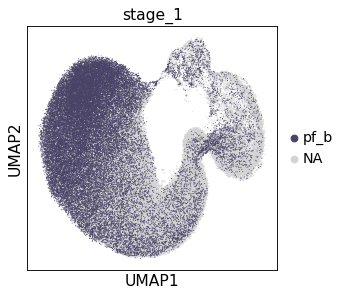

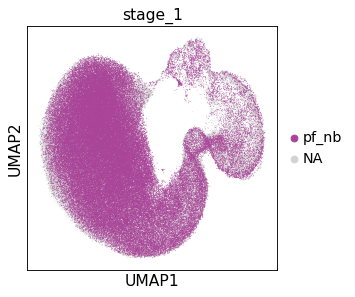

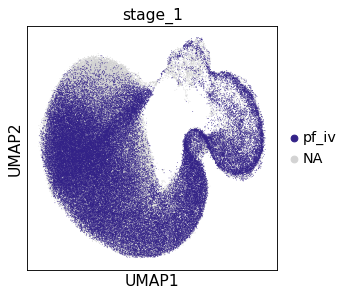

In [28]:
sc.pl.umap(adata, color='stage_1', groups=['pf_b'], size=3, save='_pfb.pdf')
sc.pl.umap(adata, color='stage_1', groups=['pf_nb'],size=2, save='_pfnb.pdf')
sc.pl.umap(adata, color='stage_1', groups=['pf_iv'],size=2, save='_pfiv.pdf')

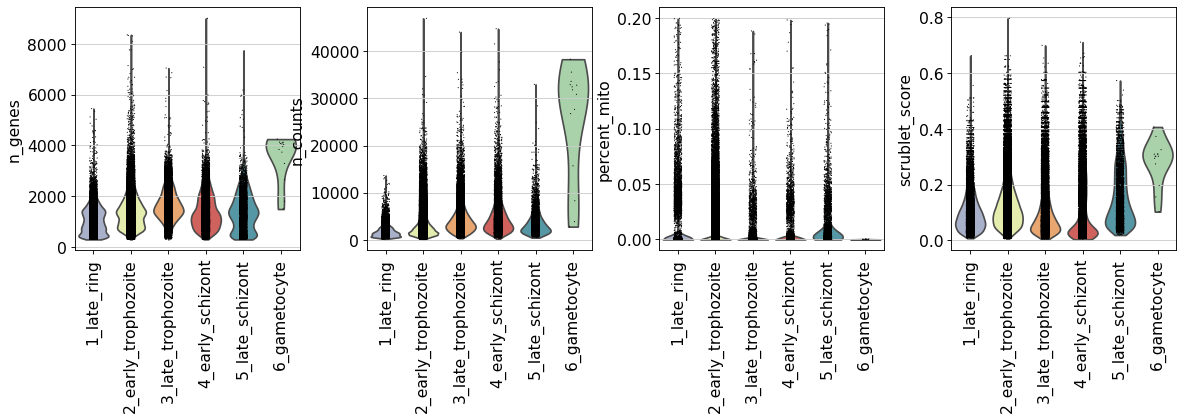

In [29]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito', 'scrublet_score'], groupby = 'idc_new', rotation = 90, save='_idc_.pdf')

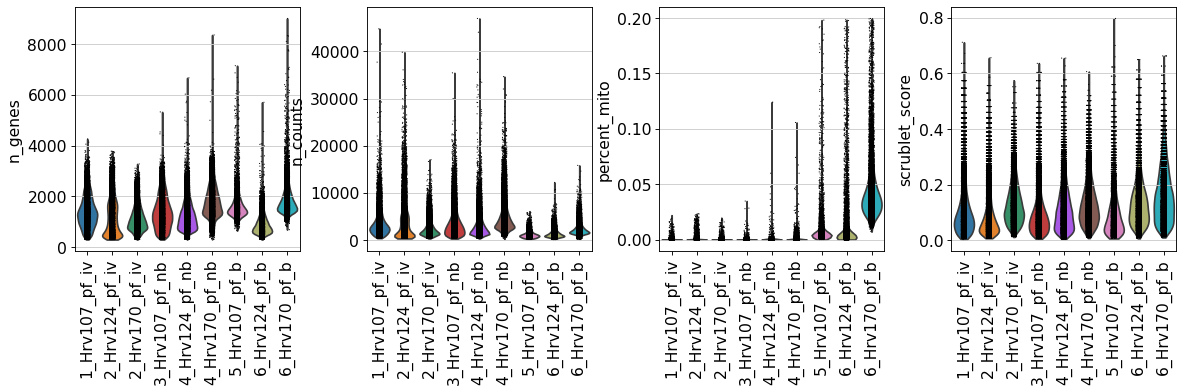

In [30]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito', 'scrublet_score'], groupby = 'sample.2', rotation = 90, save='_sample.2.pdf')

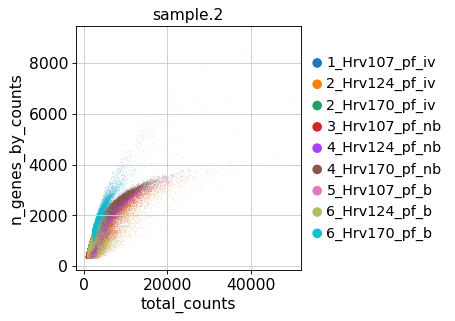

In [31]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts', color='sample.2')

In [32]:
adata

AnnData object with n_obs × n_vars = 205631 × 5515
    obs: 'sample', 'stage', 'id', 'proc', 'sample.1', 'p_batch', 'percent_mito', 'n_counts', 'n_genes', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_hum', 'pct_counts_hum', 'total_counts_pf', 'pct_counts_pf', 'stage_0', 'sample_barcode', 'stage_1', 'S_score', 'G2M_score', 'phase', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'is_doublet_0.05', 'leiden_harmony', 'idc', 'probabilities', 'sample.2', 'idc_new'
    var: 'gene_ids', 'feature_types', 'n_cells', 'hum', 'pf', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'pf_only', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'id_colors', 'leiden', 'leiden_harmony_colors', 'neighbors', 'p_batch_colors', 'pca', 'proc_colors', 'sample.1_colors', 'stage_0_colors', 'stage_1_colors', 'stage_colors', 'umap', 'idc_colors', 'sample.2_colors', 'dendrogram_leiden_harmony', 'idc_new_color

In [34]:
adata.write('./output/rna3_annotate_leiden.h5ad')

In [2]:
adata= sc.read('./output/rna3_annotate_leiden.h5ad')

In [3]:
order1=['1_late_ring', '2_early_trophozoite', '3_late_trophozoite', '4_early_schizont', '5_late_schizont', 
        '6_gametocyte']

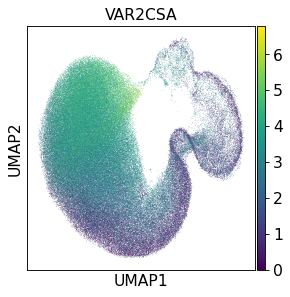

In [4]:
#check
sc.pl.umap(adata, color=['VAR2CSA' ],legend_fontsize='xx-small', use_raw=False)

## Supplementary Figure S8E - Lognormalize for dotplots

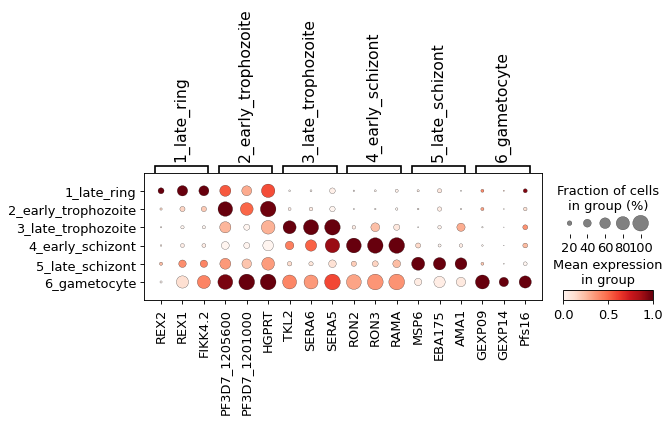

In [6]:
lineage= { '1_late_ring': {'REX1', 'REX2','FIKK4.2'},
         '2_early_trophozoite': {'HGPRT','PF3D7_1201000', 'PF3D7_1205600'},
        '3_late_trophozoite': {'SERA5','SERA6','TKL2' }, 
          '4_early_schizont': {'RON2', 'RON3', 'RAMA'},
          '5_late_schizont':{'MSP6', 'EBA175', 'AMA1'},
               '6_gametocyte':{'Pfs16', 'GEXP14', 'GEXP09'},

              }

sc.pl.dotplot(adata, var_names=lineage, groupby='idc_new',standard_scale='var',  use_raw=False, categories_order= order1,
              save='idc_selected_genes_new.pdf')

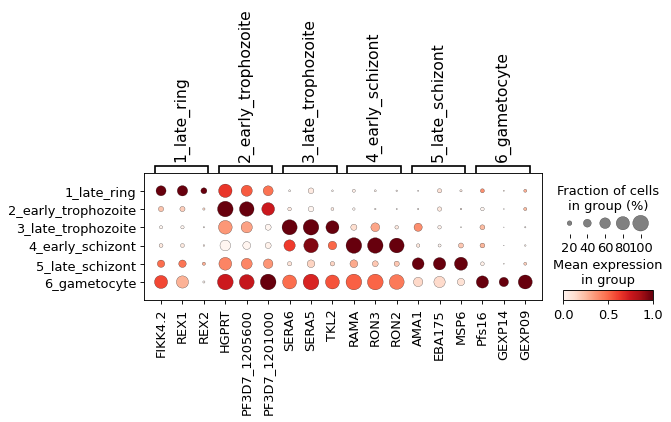

In [37]:
lineage= { '1_late_ring': {'REX1', 'REX2','FIKK4.2'},
         '2_early_trophozoite': {'HGPRT','PF3D7_1201000', 'PF3D7_1205600'},
        '3_late_trophozoite': {'SERA5','SERA6','TKL2' }, 
          '4_early_schizont': {'RON2', 'RON3', 'RAMA'},
          '5_late_schizont':{'MSP6', 'EBA175', 'AMA1'},
               '6_gametocyte':{'Pfs16', 'GEXP14', 'GEXP09'},

              }

sc.pl.dotplot(adata, var_names=lineage, groupby='idc_new',standard_scale='var',  use_raw=False,layer='log_norm', categories_order= order1,
              save='idc_selected_genes_new.pdf')

## Supplementary Figure S8E - VAR2CSA lognormalised expression

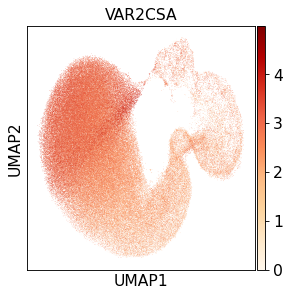

In [38]:
sc.pl.umap(adata, color=['VAR2CSA'] ,use_raw=False, color_map='OrRd', save='var2csa.pdf') 